## Experiment 2 - Principal Component Analysis 
## Nikita Chitre
## Roll No 4
## Batch A

In [ ]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Reading Data from CSV file

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
                 sep=';')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data Preprocessing 

## Data Cleaning

### Step 1: Removing duplicate rows

Create a copy of Dataset

In [ ]:
df_clean = df.copy()

In [ ]:
df_clean.shape

(1599, 12)

Check if there are duplicated rows

In [ ]:
df_clean.duplicated().sum()

240

#Removing all the duplicated records

In [ ]:
df_clean.drop_duplicates(inplace=True)

### Handling Missing values

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [ ]:
df_clean.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We can see that there are no missing values in the dataset

### Outlier Detection

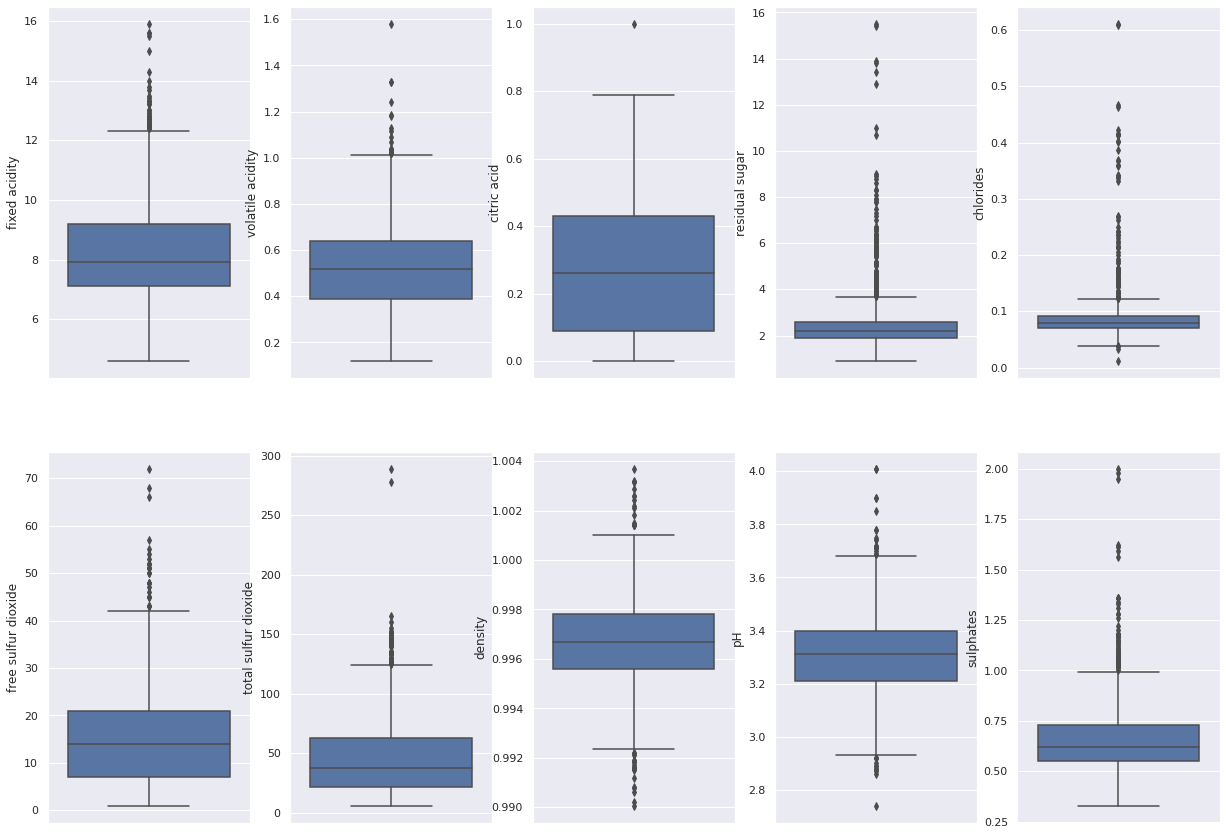

In [ ]:
f, axes = plt.subplots(2, 5, figsize=(21,15))
g = sns.boxplot(data=df_clean, y='fixed acidity', ax=axes[0,0])
g = sns.boxplot(data=df_clean, y='volatile acidity', ax=axes[0,1])
g = sns.boxplot(data=df_clean, y='citric acid', ax=axes[0,2])
g = sns.boxplot(data=df_clean, y='residual sugar', ax=axes[0,3])
g = sns.boxplot(data=df_clean, y='chlorides', ax=axes[0,4])
g = sns.boxplot(data=df_clean, y='free sulfur dioxide', ax=axes[1,0])
g = sns.boxplot(data=df_clean, y='total sulfur dioxide', ax=axes[1,1])
g = sns.boxplot(data=df_clean, y='density', ax=axes[1,2])
g = sns.boxplot(data=df_clean, y='pH', ax=axes[1,3])
g = sns.boxplot(data=df_clean, y='sulphates', ax=axes[1,4])

From the box plot we can see that all the columns have outliers. 

#### Replacing the outliers by Lower and Upper Limit

In [ ]:
for variable in ['fixed acidity','volatile acidity', 'citric acid','density', 
                  'residual sugar', 'chlorides', 'free sulfur dioxide',
                  'total sulfur dioxide','sulphates', 'pH',              
                  'alcohol']: 

    Q1 = df_clean[variable].quantile(0.25)
    Q3 = df_clean[variable].quantile(0.75)
    IQR = Q3 - Q1
    up_limit = Q3+1.5*IQR
    low_limit = Q1-1.5*IQR

    df_clean.loc[(df_clean[variable] < low_limit), variable] = low_limit
    df_clean.loc[(df_clean[variable] > up_limit), variable] = up_limit

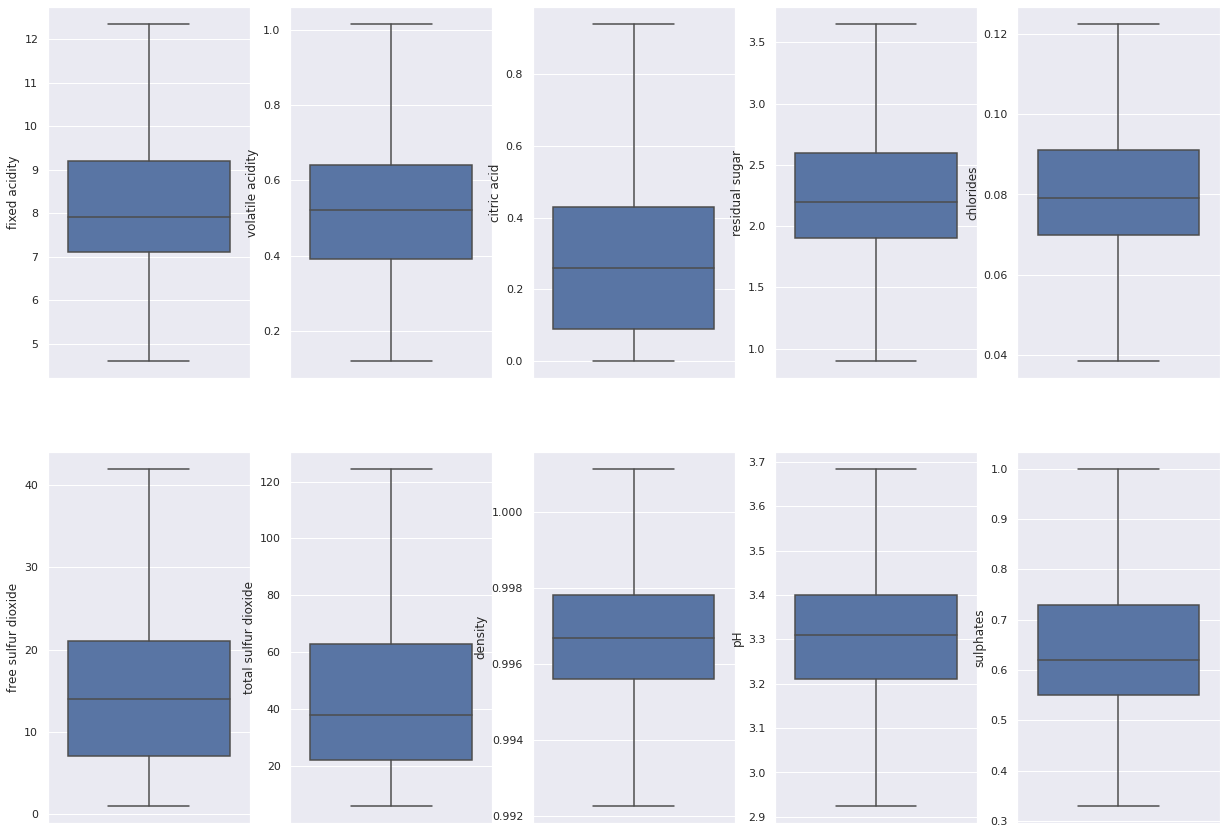

In [ ]:
f, axes = plt.subplots(2, 5, figsize=(21,15))
g = sns.boxplot(data=df_clean, y='fixed acidity', ax=axes[0,0])
g = sns.boxplot(data=df_clean, y='volatile acidity', ax=axes[0,1])
g = sns.boxplot(data=df_clean, y='citric acid', ax=axes[0,2])
g = sns.boxplot(data=df_clean, y='residual sugar', ax=axes[0,3])
g = sns.boxplot(data=df_clean, y='chlorides', ax=axes[0,4])
g = sns.boxplot(data=df_clean, y='free sulfur dioxide', ax=axes[1,0])
g = sns.boxplot(data=df_clean, y='total sulfur dioxide', ax=axes[1,1])
g = sns.boxplot(data=df_clean, y='density', ax=axes[1,2])
g = sns.boxplot(data=df_clean, y='pH', ax=axes[1,3])
g = sns.boxplot(data=df_clean, y='sulphates', ax=axes[1,4])

Now we can see from the above boxplots that all outliers have been handled

### Data Reduction

#### Correlation of variables

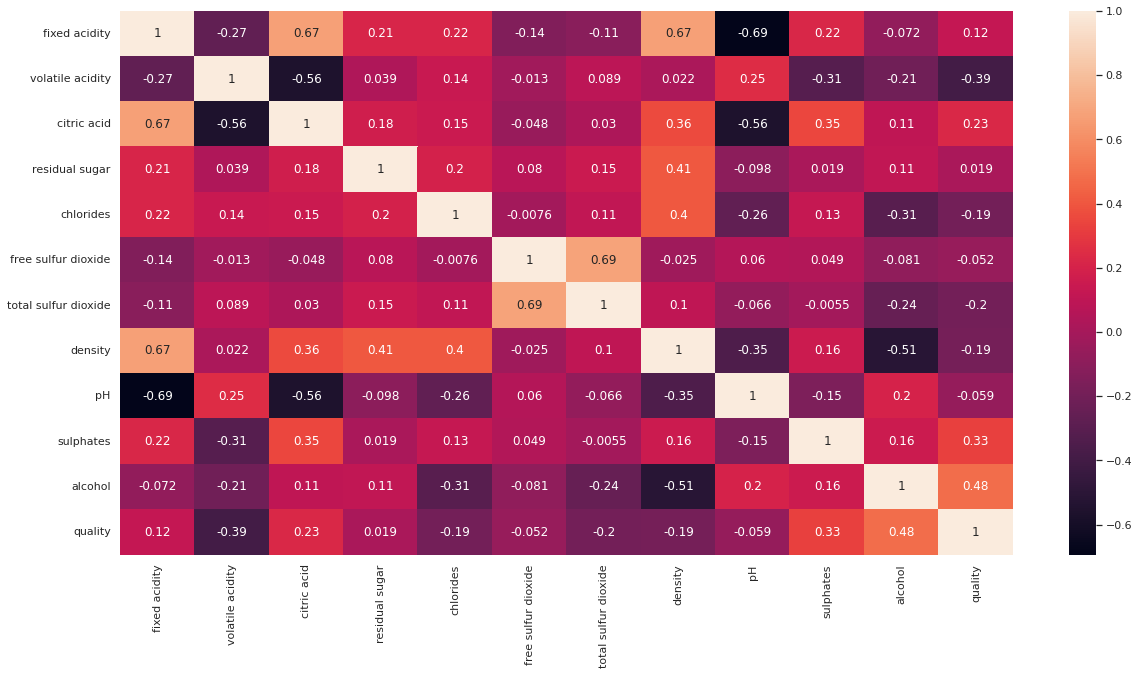

In [ ]:
fig = plt.figure(figsize =(20, 10))

_ = sns.heatmap(df_clean.corr(), annot = True) 

From the Heatmap, we can see that Density and pH have very low correlation with output variable quality. Hence we can drop them. 

In [ ]:
df_clean = df_clean.drop(['density', 'pH'],axis=1)

## Data Visualization

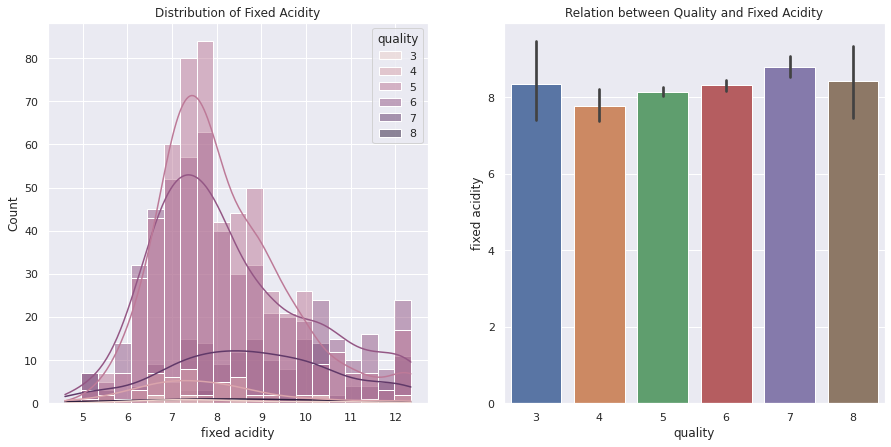

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
axes[0].set_title('Distribution of Fixed Acidity')
_ = sns.histplot(data = df_clean, x = 'fixed acidity', hue = 'quality',kde=True, ax=axes[0])   
sns.barplot(x = 'quality', y = 'fixed acidity', data = df_clean)
_ = axes[1].set_title('Relation between Quality and Fixed Acidity')

From the above graphs we can see that Quality and Fixed Acidity do not have much correlation with each other

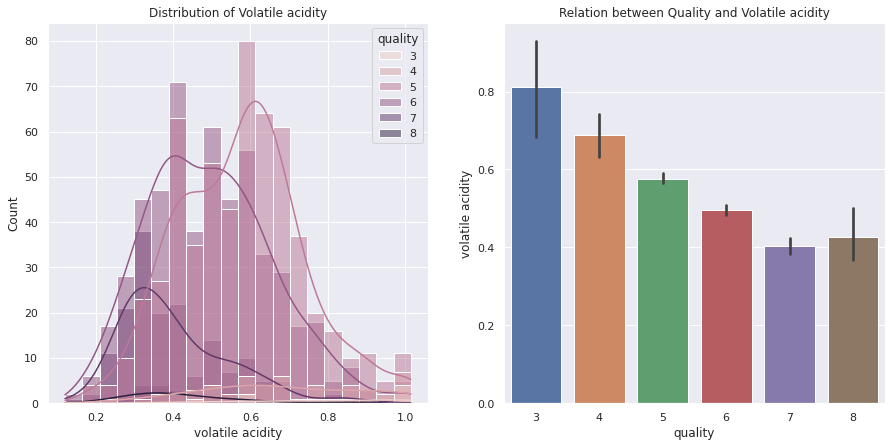

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
axes[0].set_title('Distribution of Volatile acidity')
_ = sns.histplot(data = df_clean, x = 'volatile acidity', hue = 'quality',kde=True, ax=axes[0])   
sns.barplot(x = 'quality', y = 'volatile acidity', data = df_clean)
_ = axes[1].set_title('Relation between Quality and Volatile acidity')


From the above graphs we can see that as the quality increases, volatile acidity decreases. 

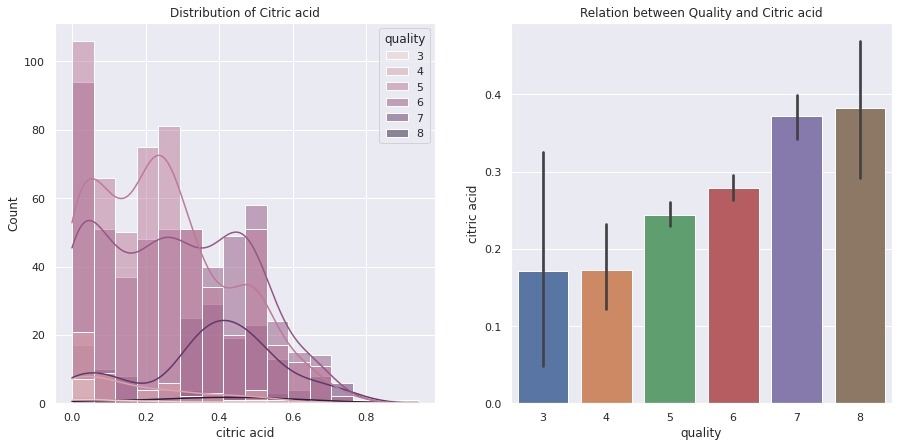

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
axes[0].set_title('Distribution of Citric acid')
_ = sns.histplot(data = df_clean, x = 'citric acid', hue = 'quality',kde=True, ax=axes[0])   
sns.barplot(x = 'quality', y = 'citric acid', data = df_clean)
_ = axes[1].set_title('Relation between Quality and Citric acid')


Here we can see that the composition of citric acid go higher as we go higher in the quality of the wine

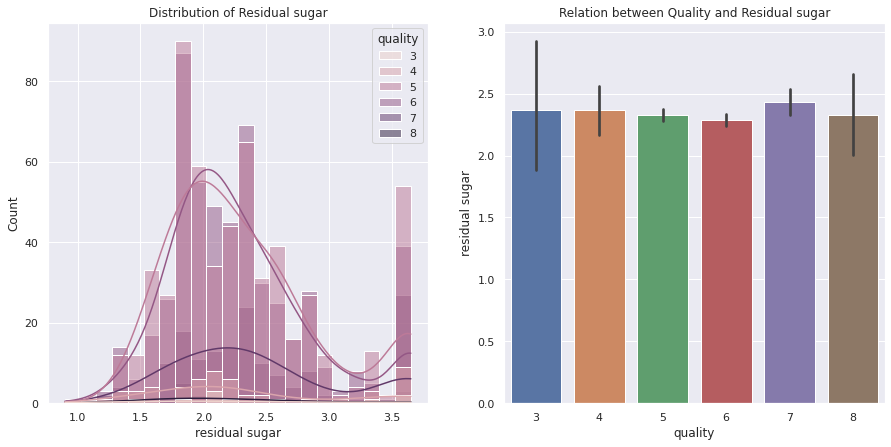

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
axes[0].set_title('Distribution of Residual sugar')
_ = sns.histplot(data = df_clean, x = 'residual sugar', hue = 'quality',kde=True, ax=axes[0])   
sns.barplot(x = 'quality', y = 'residual sugar', data = df_clean)
_ = axes[1].set_title('Relation between Quality and Residual sugar')

From the above graphs we can see that Quality and Residual Sugar do not have much correlation with each other

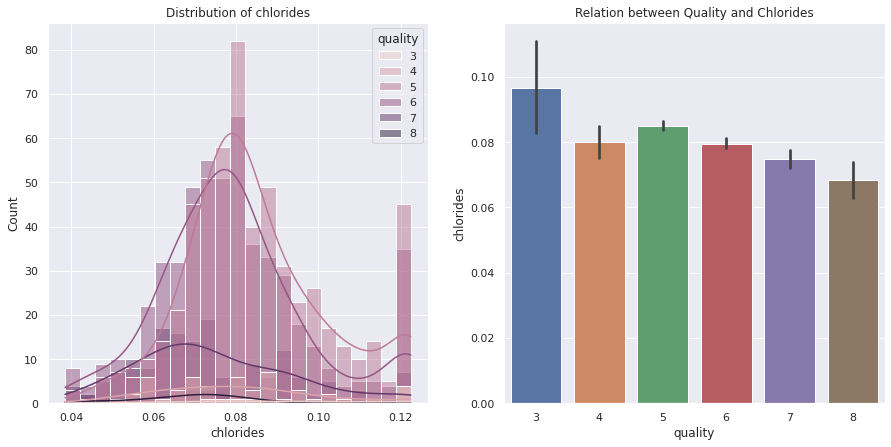

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
axes[0].set_title('Distribution of chlorides')
_ = sns.histplot(data = df_clean, x = 'chlorides', hue = 'quality',kde=True, ax=axes[0])   
sns.barplot(x = 'quality', y = 'chlorides', data = df_clean)
_ = axes[1].set_title('Relation between Quality and Chlorides')

Here we can see that composition of chlorides also go down as we go higher in the quality of the wine

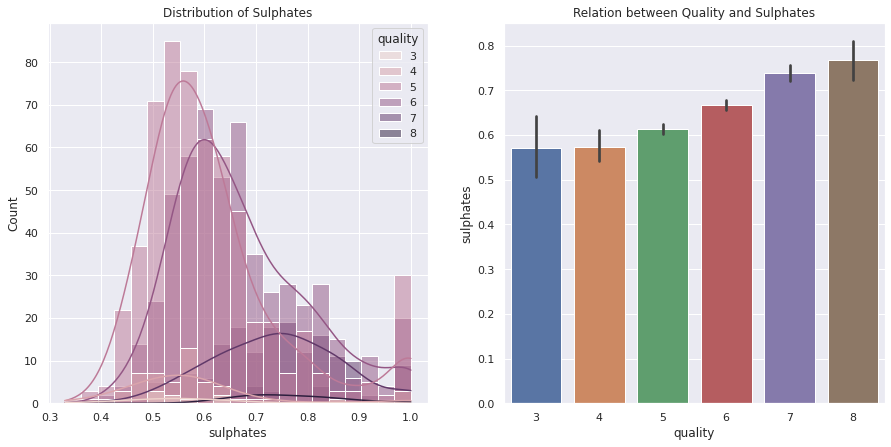

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
axes[0].set_title('Distribution of Sulphates')
_ = sns.histplot(data = df_clean, x = 'sulphates', hue = 'quality',kde=True, ax=axes[0])   
sns.barplot(x = 'quality', y = 'sulphates', data = df_clean)
_ = axes[1].set_title('Relation between Quality and Sulphates')

Sulphates level goes higher with the quality of wine. Quality and Sulphates have correlation with each other.

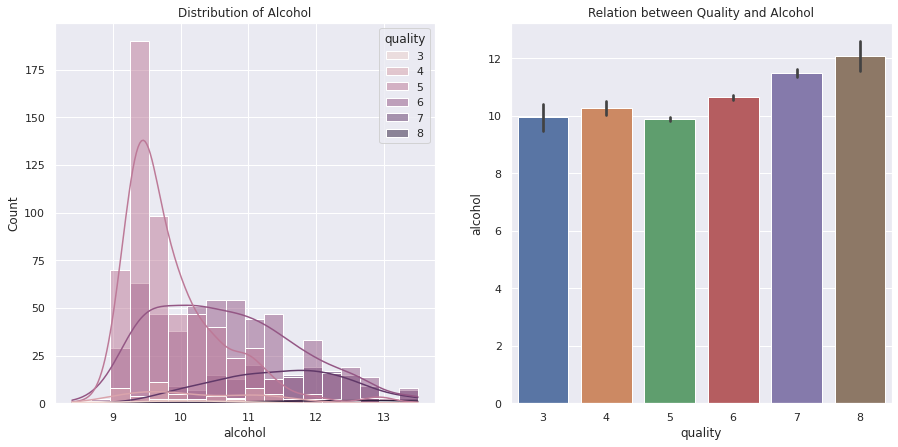

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
axes[0].set_title('Distribution of Alcohol')
_ = sns.histplot(data = df_clean, x = 'alcohol', hue = 'quality',kde=True, ax=axes[0])   
sns.barplot(x = 'quality', y = 'alcohol', data = df_clean)
_ = axes[1].set_title('Relation between Quality and Alcohol')

Alcohol level also goes higher as te quality of wine increases. Hence they have correlation with each other

### Data Normalization 

#### Train test split

In [ ]:
#Feature Variables
X = df_clean.drop('quality',axis=1)
#Target Variable
y = df_clean['quality']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=17)

#### Using Standard Scaler

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

In [ ]:
X_train_scaled = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Implementing PCA from Scratch

In [ ]:
class convers_pca():

    def __init__(self, no_of_components):
        self.no_of_components = no_of_components
        self.eigen_values = None
        self.eigen_vectors = None
        self.explained_variance_ratio = None
        
    def transform(self, x):
        return np.dot(x - self.mean, self.projection_matrix.T)
    
    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean
    
    def fit(self, x):

        self.no_of_components = x.shape[1] if self.no_of_components is None else self.no_of_components
        self.mean = np.mean(x, axis=0)
        
        # covariance matrix
        cov_matrix = np.cov(x - self.mean, rowvar=False)
        
        # computing eigen values and eignen vectors
        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)

        self.eigen_vectors = self.eigen_vectors.T
        
        print('\nEigen Values')
        print(self.eigen_values)

        # sorted components
        self.sorted_components = np.argsort(self.eigen_values)[::-1]

        print('\nSorted Components')
        print(self.sorted_components)
        
        # computing variance ratio 
        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]
        self.explained_variance = self.eigen_values[self.sorted_components]
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()

        print('\nExplained Variance ratio: ')
        print(self.explained_variance_ratio)

#### Applying PCA on the dataset

In [ ]:
pca = convers_pca(no_of_components = None)
pca.fit(X_train_scaled)
Z = pca.transform(X_train_scaled)


Eigen Values
[2.35140214 1.83182176 1.41996633 0.18163819 0.30786934 0.47201909
 0.53465117 0.86747076 1.04144851]

Sorted Components
[0 1 2 8 7 6 5 4 3]

Explained Variance ratio: 
[0.26102655 0.20334851 0.15762889 0.11561005 0.09629697 0.05935103
 0.05239832 0.03417623 0.02016345]


#### Visualization PCA component variance using Scree plot

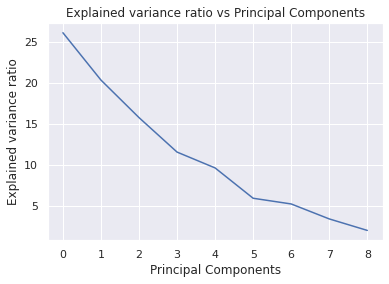

In [ ]:
sns.set()
plt.plot(pca.explained_variance_ratio*100) # scree plot
plt.title('Explained variance ratio vs Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained variance ratio')
plt.show()

The above plot is called Scree plot. This plot shows variances explained by each component. Ideally, we would like to see an elbow shape in order to decide which PCs to keep and which ones to disregard.  From the above plot, we can take first 5 components to contain most of the information inside the data.

#### Using 5 components in PCA

In [ ]:
pca = convers_pca(no_of_components = 5)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


Eigen Values
[2.35140214 1.83182176 1.41996633 0.18163819 0.30786934 0.47201909
 0.53465117 0.86747076 1.04144851]

Sorted Components
[0 1 2 8 7 6 5 4 3]

Explained Variance ratio: 
[0.26102655 0.20334851 0.15762889 0.11561005 0.09629697 0.05935103
 0.05239832 0.03417623 0.02016345]


In [ ]:
pca_df = pd.DataFrame(X_train_pca)

Transformed dataframe with 5 components

In [ ]:
pca_df.head()

,0,1,2,3,4
0,-1.373785,1.484416,-0.479211,0.111348,-0.563278
1,2.889367,0.019760,-0.718015,0.565212,0.526696
2,-0.061372,1.071148,-1.102414,-1.203188,-0.281852
3,-0.351625,-3.308247,-0.434729,-1.257401,-0.051859
4,-0.634714,-0.807522,0.021297,-0.706827,0.922154


## Model Training

In [ ]:
linearRegr = LinearRegression()   

In [ ]:
linearRegr.fit(X_train_pca, y_train)     

LinearRegression()

## Model Evaluation

In [ ]:
y_pred = linearRegr.predict(X_train_pca)
mse = mean_squared_error(y_train, y_pred)
print("Linear Regression MSE:", mse)

Linear Regression MSE: 0.44753257091676657


In [ ]:
y_pred = linearRegr.predict(X_test_pca)
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression MSE:", mse)

Linear Regression MSE: 0.3954390303478218


We can see that Linear Regression model have Mean Square Error of 0.39 on testing data. 

### Conclusion



1.   In PCA we choose those many components such that the transformed feature space still contains most of the information in the large set. 
2.   PCA is an unsupervised learning algorithm and it is an orthogonal linear transform.  

